# Pandas (4)
파이썬의 데이터 분석 라이브러리


### < DataFrame 단일 값 추출엔 at, iat >
- 단일 값 검색에 최적화된 at과 iat이 존재합니다. 
- 이 둘은 loc과 iloc도 단일 값을 구할 수 있지만 at, iat의 속도가 더 빠릅니다.
- at은 행, 열의 label으로 인덱싱합니다. iat은 행, 열의 인덱스(정수)로 인덱싱합니다.
- nba 데이터를 가져와서 속도 테스트를 해보려합니다.(Name 컬럼을 인덱스로 활용했습니다.)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
nba = pd.read_csv("datas/nba.csv", index_col = "Name")
nba.nlargest(1, columns = ["Salary"])

,Team,Position,Birthday,Salary
Name,,,,
Stephen Curry,Golden State Warriors,PG,3/14/88,40231758


- %%timeit은 jupyter 매직 메서드입니다. 하는 역할은 코드를 실행하고 걸리는 평균 시간을 측정해줍니다.
- at과 loc이 같은 DataFrame을 가지고 같은 단일 값에 인덱싱을 하고 있습니다. 
-= 결과를 보면 100,000회 반복한 평균 실행시간이 도출된 것을 알 수 있으며 at이 loc에 비해 빠른 걸 확인할 수 있습니다.

In [4]:
%%timeit
nba.at["Stephen Curry", "Birthday"]

3.75 µs ± 193 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [5]:
%%timeit
nba.loc["Stephen Curry", "Birthday"]

5.98 µs ± 78 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


- 이번에는 iat과 iloc입니다. 
- 마찬가지로 동일한 DataFrame에 동일한 위치의 인덱스에 인덱싱하고 있습니다. 
- 결과도 iat이 iloc보다 빠릅니다.

In [6]:
%%timeit
nba.iat[263, 1]

9.32 µs ± 193 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [7]:
%%timeit
nba.iloc[263, 1]

12.6 µs ± 217 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### < Series에 loc, iloc, at, iat >
- loc, iloc, at, iat은 Series 객체에도 사용할 수 있습니다. 
- loc, at은 label index 값을 활용해서 인덱싱합니다. 
- iloc, iat은 Series의 index(정수) 값으로 인덱싱을 하면 됩니다.

### < DataFrame columns 값 변경하기 >
- columns 속성에 리스트 값으로 재할당하면 해당 DataFrame의 columns를 변경할 수 있습니다.
- 단 재할당할 리스트의 크기는 columns 속성의 크기와 동일해야 합니다.

In [8]:
nba.columns

Index(['Team', 'Position', 'Birthday', 'Salary'], dtype='object')

In [9]:
nba.columns = ['Team', 'Position', 'Birthday', 'Pay']

In [10]:
nba.head(1)

,Team,Position,Birthday,Pay
Name,,,,
Shake Milton,Philadelphia 76ers,SG,9/26/96,1445697


- rename() 메서드를 활용해서 변경할 수 있습니다. 
- columns 키워드 인수에 딕셔너리 값을 전달합니다. 
- 딕셔너리의 키에는 변경 전의 값을 딕셔너리의 값에는 변경 후의 값을 넣습니다.
- 여러 개의 columns의 이름을 변경할 때는 rename() 메서드의 columns 키워드 인수에 전달할 딕셔너리에 요소를 여럿 입력하면 됩니다.
- 단 rename은 기본적으로 inplace 키워드 인수 값이 False이므로, 재할당하거나 inplace=True로 메서드를 호출해야 변경 사항이 적용됩니다.

In [11]:
nba.rename(columns = {"Date of Birth" : "Birthday",
                      "Pay" : "Salary"})

,Team,Position,Birthday,Salary
Name,,,,
Shake Milton,Philadelphia 76ers,SG,9/26/96,1445697
Christian Wood,Detroit Pistons,PF,9/27/95,1645357
PJ Washington,Charlotte Hornets,PF,8/23/98,3831840
Derrick Rose,Detroit Pistons,PG,10/4/88,7317074
Marial Shayok,Philadelphia 76ers,G,7/26/95,79568
...,...,...,...,...
Austin Rivers,Houston Rockets,PG,8/1/92,2174310
Harry Giles,Sacramento Kings,PF,4/22/98,2578800
Robin Lopez,Milwaukee Bucks,C,4/1/88,4767000


- ename() 메서드를 활용해서 DataFrame의 index 값도 변경할 수 있습니다. 
- index 키워드 인수에 딕셔너리 값을 전달합니다. 
- 딕셔너리 키에는 변경 전의 값을 딕셔너리의 값에는 변경 후의 값을 넣습니다.

In [12]:
nba.loc["Giannis Antetokounmpo"]

Team        Milwaukee Bucks
Position                 PF
Birthday            12/6/94
Pay                25842697
Name: Giannis Antetokounmpo, dtype: object

In [13]:
nba = nba.rename(index = {"Giannis Antetokounmpo" : "Greek Freak"})

In [14]:
nba.loc["Greek Freak"]

Team        Milwaukee Bucks
Position                 PF
Birthday            12/6/94
Pay                25842697
Name: Greek Freak, dtype: object

### < 연습 문제 >
- nfl.csv 파일에는 National Football League의 선수 데이터를 갖고 있습니다. 
- 이 파일을 읽어서 DataFrame으로 가져와보세요.
- 해당 csv 파일은 Name, Team, Position, Birthday, Salary의 열을 갖습니다.
- Birthday 열은 날짜/시간 형태의 값으로 불러와야 합니다.
- Name 열은 index로 사용합니다.

In [18]:
nfl = pd.read_csv("datas/nfl.csv",
                  parse_dates = ["Birthday"],
                  index_col = ["Name"])
nfl

,Team,Position,Birthday,Salary
Name,,,,
Tremon Smith,Philadelphia Eagles,RB,1996-07-20,570000
Shawn Williams,Cincinnati Bengals,SS,1991-05-13,3500000
Adam Butler,New England Patriots,DT,1994-04-12,645000
Derek Wolfe,Denver Broncos,DE,1990-02-24,8000000
Jake Ryan,Jacksonville Jaguars,OLB,1992-02-27,1000000
...,...,...,...,...
Bashaud Breeland,Kansas City Chiefs,CB,1992-01-30,805000
Craig James,Philadelphia Eagles,CB,1996-04-29,570000
Jonotthan Harrison,New York Jets,C,1991-08-25,1500000


### < 연습 문제 >
- nfl 데이터셋에서 팀당 몇 명의 선수가 소속되어 있는지 확인해보세요.


In [37]:
nfl["Team"].value_counts()

New York Jets           58
Kansas City Chiefs      56
Washington Redskins     56
New Orleans Saints      55
San Francisco 49Ers     55
Denver Broncos          54
Minnesota Vikings       54
Los Angeles Chargers    54
Seattle Seahawks        53
Dallas Cowboys          53
Buffalo Bills           53
Atlanta Falcons         53
Detroit Lions           53
Chicago Bears           53
Los Angeles Rams        52
New York Giants         52
Philadelphia Eagles     52
Houston Texans          52
Arizona Cardinals       51
Cincinnati Bengals      51
Green Bay Packers       51
Oakland Raiders         51
Jacksonville Jaguars    50
Cleveland Browns        49
Miami Dolphins          49
Indianapolis Colts      49
Carolina Panthers       49
New England Patriots    49
Baltimore Ravens        48
Pittsburgh Steelers     47
Tampa Bay Buccaneers    47
Tennessee Titans        46
Name: Team, dtype: int64

- 가장 높은 연봉을 받는 5명을 조회해보세요.

In [45]:
nfl["Salary"]  ## 연봉을 오름차순으로 하고 head(5) 해도 될텐데

Name
Tremon Smith           570000
Shawn Williams        3500000
Adam Butler            645000
Derek Wolfe           8000000
Jake Ryan             1000000
                       ...   
Bashaud Breeland       805000
Craig James            570000
Jonotthan Harrison    1500000
Chuma Edoga            495000
Tajae Sharpe          2025000
Name: Salary, Length: 1655, dtype: int64

In [39]:
nfl.nlargest(5, columns = ["Salary"])

,Team,Position,Birthday,Salary
Name,,,,
Kirk Cousins,Minnesota Vikings,QB,1988-08-19,27500000
Marcus Mariota,Tennessee Titans,QB,1993-10-30,20922000
Jameis Winston,Tampa Bay Buccaneers,QB,1994-01-06,20922000
Derek Carr,Oakland Raiders,QB,1991-03-28,19900000
Jimmy Garoppolo,San Francisco 49Ers,QB,1991-11-02,17200000


- 팀마다 연봉을 많이 받는 사람들을 내림차순으로 조회해보세요.
- 팀은 오름차순으로 정렬합니다.

In [41]:
nfl.sort_values(by = ["Team", "Salary"], ascending = [True, False])

,Team,Position,Birthday,Salary
Name,,,,
Chandler Jones,Arizona Cardinals,OLB,1990-02-27,16500000
Patrick Peterson,Arizona Cardinals,CB,1990-07-11,11000000
Larry Fitzgerald,Arizona Cardinals,WR,1983-08-31,11000000
David Johnson,Arizona Cardinals,RB,1991-12-16,5700000
Justin Pugh,Arizona Cardinals,G,1990-08-15,5000000
...,...,...,...,...
Ross Pierschbacher,Washington Redskins,C,1995-05-05,495000
Kelvin Harmon,Washington Redskins,WR,1996-12-15,495000
Wes Martin,Washington Redskins,G,1996-05-09,495000


### 뒤에거 배우고 다시

- New York Jets 팀에서 나이가 가장 많은 선수가 누구이며, 그의 생일을 조회해 보세요.
- index를 Team으로 변경하세요. 단 기존 index는 column으로 다시 복원합니다.


In [ ]:
nfl = nfl.rename(index = {"Giannis Antetokounmpo" : "Greek Freak"})

In [ ]:
nfl.rename(columns = {"Date of Birth" : "Birthday",
                      "Pay" : "Salary"})

In [ ]:
.reset_index().set_index("Team")

In [ ]:
.loc["New York Jets"].nsmallest(1, "Birthday")

### < Series apply() 메서드 >
- Series의 각 값에 대해 모두 함수를 적용하는 방법입니다. 
- 즉 Series 객체의 값에 대해 한 번씩 함수를 호출하고 함수 호출의 반환 값으로 구성된 새로운 Series 객체를 반환하는 apply() 메서드를 활용해 보겠습니다.
- apply() 메서드의 첫 인자 값은 함수 객체(소괄호 없이)를 넘겨주며 필수값입니다.

- 이전의 pokemon.csv 파일을 다시 Series로 불러와봅시다. 
- 그리고 Series 객체의 값을 보면 ‘/’를 구분자로 2개의 타입을 갖는 값을 확인할 수 있습니다. 타입 값을 받아오고 
- 타입이 2개이면 “Multi”라는 값을 반환하고, 타입이 1개이면 “Single”이라고 반환하는 함수를 만들어 보세요. 

In [58]:
pokemons = pd.read_csv("datas/pokemon.csv", index_col = ["Pokemon"]).squeeze()
pokemons

Pokemon
Bulbasaur      Grass / Poison
Ivysaur        Grass / Poison
Venusaur       Grass / Poison
Charmander               Fire
Charmeleon               Fire
                    ...      
Stakataka        Rock / Steel
Blacephalon      Fire / Ghost
Zeraora              Electric
Meltan                  Steel
Melmetal                Steel
Name: Type, Length: 809, dtype: object

- 그 함수는 아래와 같이 만들 수 있습니다. 
- 그 함수로 앞서 가져온 pokemons에 적용하려면 apply() 메서드를 활용할 수 있습니다. 
- 첫번째 인자인 func에 함수 객체를 전달하면 됩니다.

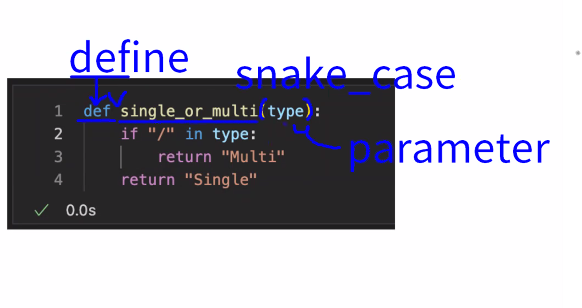

In [60]:
def single_or_multi(type) :
    if "/" in type : 
        return "Multi"
    return "Single"

In [61]:
pokemons.apply(single_or_multi)

Pokemon
Bulbasaur       Multi
Ivysaur         Multi
Venusaur        Multi
Charmander     Single
Charmeleon     Single
                ...  
Stakataka       Multi
Blacephalon     Multi
Zeraora        Single
Meltan         Single
Melmetal       Single
Name: Type, Length: 809, dtype: object

### < 연습 문제 >
- 타입이 2개인 포켓몬의 수와 타입이 1개인 포켓몬의 수를 각각 구해보세요.

In [63]:
pokemons.apply(single_or_multi).value_counts()

Multi     405
Single    404
Name: Type, dtype: int64

### < DataFrame apply() 메서드 >

DataFrame에 대해 Function을 적용할 때에도 apply()를 활용하면 좋습니다. 

이 메서드는 첫 인자로 함수를 필수 값으로 받습니다. 

경우에 따라 두 번째 인자로 axis를 사용할 수 있습니다. 

axis 인자는 0이 default 입니다. 
            
            
- axis가 0 or ‘index’(=> row 라고 생각)인 경우 행마다 함수를 적용합니다.
         
- axis가 1 or ‘columns’인 경우 열마다 함수를 적용합니다.

- 아래의 예제에서는 NumPy의 np.sqrt()를 사용하여 적용해보았습니다. 
- np.sqrt는 각 요소마다 적용되는 함수(universal function, ufunc)로 
- 이 경우에는 np.sqrt(df)와 동일한 결과를 가져옵니다.

In [64]:
df = pd.DataFrame([[4, 9]] * 3, columns = ["A", "B"])
df

,A,B
0,4,9
1,4,9
2,4,9


In [66]:
df.apply(np.sqrt)   # 제곱근을 요소마다

,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


In [70]:
np.sqrt(df) # 위랑 결과 같음

,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


- 이번 예제에서는 차원 축소 함수(reducing function)인 sum을 활용해보겠습니다. 
- 이때는 axis의 값에 따라 값의 축소되는 방향이 달라서 서로 결과가 다릅니다.

In [71]:
df.apply(np.sum, axis = "index")

A    12
B    27
dtype: int64

In [72]:
df.apply(np.sum, axis = "rows")

A    12
B    27
dtype: int64

In [74]:
df.apply(np.sum, axis = 0)

A    12
B    27
dtype: int64

- 함수의 return이 column마다 리스트를 반환하면 DataFrame의 결과를 얻을 수 있습니다. 
- 함수의 return이 row마다 리스트를 반환하면 각 row마다 리스트를 하나의 값으로 취급하는 Series 타입의 결과가 나옵니다. 

In [75]:
df

,A,B
0,4,9
1,4,9
2,4,9


In [76]:
df.apply(lambda x : [1, 2], axis = 0)

,A,B
0,1,1
1,2,2


In [77]:
df.apply(lambda x : [1, 2], axis = 1)

0    [1, 2]
1    [1, 2]
2    [1, 2]
dtype: object

- 이번에는 앞의 axis=1에 동시에 result_type=’expand’를 인수로 전달해봅시다. 
- 그러면 이번에는 리스트를 하나의 값으로 보지 않고 리스트 요소마다 column으로 인식하도록 확장합니다. 
- 그래서 DataFrame의 결과를 얻을 수 있습니다.

In [78]:
df

,A,B
0,4,9
1,4,9
2,4,9


In [79]:
df.apply(lambda x : [1, 2], axis = 1)

0    [1, 2]
1    [1, 2]
2    [1, 2]
dtype: object

In [80]:
df.apply(lambda x : [1, 2], axis = 1, result_type = "expand")

,0,1
0,1,2
1,1,2
2,1,2


- Series를 return하는 함수를 사용하면 result_type=’expand’와 비슷한 결과를 얻을 수 있습니다. 
- 이때 Series의 index는 column label이 됩니다.

In [81]:
df

,A,B
0,4,9
1,4,9
2,4,9


In [82]:
df.apply(lambda x : [1, 2], axis = 1, result_type = "expand")

,0,1
0,1,2
1,1,2
2,1,2


In [85]:
df.apply(lambda x : pd.Series([1, 2], index = ["foo", "bar"]), axis = 1)

,foo,bar
0,1,2
1,1,2
2,1,2


- result_type=’broadcast’를 인수로 전달하면 동일한 shape의 결과를 보장합니다. 
- 함수로부터 반환되는 게 리스트인지 스칼라인지에 상관없이 axis 방향으로 브로드캐스트합니다. 
- 결과의 column label은 본래의 column label을 유지합니다.


In [86]:
df.apply(lambda x : [1, 2], axis = 1, result_type = "broadcast")

,A,B
0,1,2
1,1,2
2,1,2


- result_type=’broadcast’를 인수로 전달할 때 함수로부터 return되는 값이 기존 shape으로 브로드캐스트할 수 없는 shape이라면 ValueError가 발생됩니다.

In [88]:
df.apply(lambda x : [1, 2, 3], axis = 1, result_type = "broadcast")

ValueError: cannot broadcast result

- 예를 들어 column마다의 최대값과 최소값의 차이를 구하고 싶으면 다음과 같은 lambda 함수를 넣으면 됩니다

In [89]:
df3 = pd.DataFrame({
    "A" : [1, 3, 4, 3, 4],
    "B" : [2, 3, 1, 2, 3],
    "C" : [1, 5, 2, 4, 4]
})
df3

,A,B,C
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [ ]:
axis를 쓰지않았을 땐 0이 기본값 axis = 0

In [91]:
df3.apply(lambda x: x.max() - x.min())

A    3
B    2
C    4
dtype: int64

- 만약 row에 대해 적용하고 싶으면 axis=1 인수를 씁니다.

(위에 방향을 바꿔서 컬럼들끼리의 값을 구하겠지)

In [93]:
df3.apply(lambda x: x.max() - x.min(), axis = 1)

0    1
1    2
2    3
3    2
4    1
dtype: int64

- 각 column에 대해 어떤 값이 얼마나 사용되었는지 알고 싶다면 value_counts 함수를 넣으면 됩니다.

In [92]:
df3.apply(pd.value_counts)

,A,B,C
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


In [94]:
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


- 다음과 같이 타이타닉호의 승객 중 나이 20살을 기준으로 성인(adult)과 미성년자 (child)를 구별하는 label column을 만들 수 있습니다.

In [95]:
titanic["adult/child"] = titanic.apply(lambda r : "adult" 
                                       if r.age >= 20
                                       else "child", axis = 1)

In [96]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,adult
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,child
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,adult
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,adult


### < 연습 문제 >

- 타이타닉호의 승객에 대해 나이와 성별에 의한 카테고리 column인 category1 열을 만들어보세요. 
- category1 카테고리는 다음과 같이 정의됩니다.

(1) 20살이 넘으면 성별을 그대로 사용합니다.

(2) 20살 미만이면 성별에 관계없이 “child”라고 합니다.

In [122]:
titanic["category1"] = titanic.apply(lambda r : r.sex
                                       if r.age >= 20
                                       else "child", axis = 1)

titanic[["age","category1"]]

,age,category1
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male
...,...,...
886,27.0,male
887,19.0,child
888,NaN,child
889,26.0,male


In [128]:
# 해설

titanic["category1"] = titanic.apply(lambda r : r["sex"]
                                       if r.age >= 20
                                       else "child", axis = 1)

titanic[["age","category1"]]

,age,category1
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male
...,...,...
886,27.0,male
887,19.0,child
888,NaN,child
889,26.0,male


In [127]:
# 함수

def cate1(titanic):
    if titanic['age'] >= 20:
        return titanic['sex']
    return 'child'

titanic['category1'] = titanic.apply(cate1, axis=1)

titanic[["age","category1"]]

,age,category1
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male
...,...,...
886,27.0,male
887,19.0,child
888,NaN,child
889,26.0,male


### < DataFrame fillna() 메서드 >
fillna() 메서드를 사용하여 NaN 값을 원하는 값으로 바꿀 수 있습니다. 

첫 인자로NaN을 변경하고자 하는 값을 전달하면 됩니다.

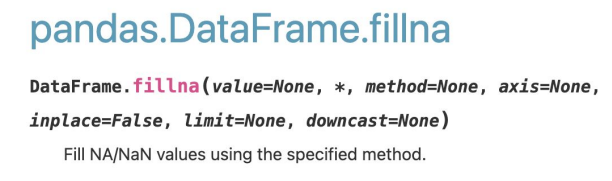

- 아래 코드는 fillna() 메서드를 활용하여 NaN 값을 0으로 변경하는 예제입니다.


In [129]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, np.nan],
                   [np.nan, 3, np.nan, 4]],
                  columns = list("ABCD"))
df

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


In [131]:
df.fillna(0)      # NaN 값이 있는 곳들이 0으로 채워짐

,A,B,C,D
0,0.0,2.0,0.0,0.0
1,3.0,4.0,0.0,1.0
2,0.0,0.0,0.0,0.0
3,0.0,3.0,0.0,4.0


- fillna() 메서드 value 값으로 column label을 key로 갖는 딕셔너리를 전달할 수 있습니다.
- 그러면 column마다 NaN을 대치하는 값을 각각 다르게 지정할 수 있습니다.

In [132]:
df

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


In [137]:
values = {"A" : 0, "B" : 1, "C" : 2, "D" : 3}   # 딕셔너리로 만들어서 value들을 집어넣어
df.fillna(value = values)

,A,B,C,D
0,0.0,2.0,2.0,0.0
1,3.0,4.0,2.0,1.0
2,0.0,1.0,2.0,3.0
3,0.0,3.0,2.0,4.0


- fillna() 메서드에 limit 키워드 인자에 숫자를 전달하여 그 숫자만큼 column마다 변경 횟수를 제한할 수 있습니다.

In [138]:
df

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


In [141]:
values = {"A" : 0, "B" : 1, "C" : 2, "D" : 3}
df.fillna(value = values, limit = 1 ) 
                    # 여러개의 NaN값이 있을 때 column마다 1회만 변경하고 나머진 그대로 NaN

,A,B,C,D
0,0.0,2.0,2.0,0.0
1,3.0,4.0,NaN,1.0
2,NaN,1.0,NaN,3.0
3,NaN,3.0,NaN,4.0


- fillna() 메서드에 DataFrame을 value로 전달해서 NaN 값을 대체할 수 있습니다. 
- 다만 column label과 row index가 일치하지 않으면 적용되지 않습니다.

In [142]:
df

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


In [145]:
df2 = pd.DataFrame(np.zeros((3,  4)), columns = list("ABCE"))   # E 인거 주의!
df.fillna(df2)

,A,B,C,D
0,0.0,2.0,0.0,0.0
1,3.0,4.0,0.0,1.0
2,0.0,0.0,0.0,NaN
3,NaN,3.0,NaN,4.0


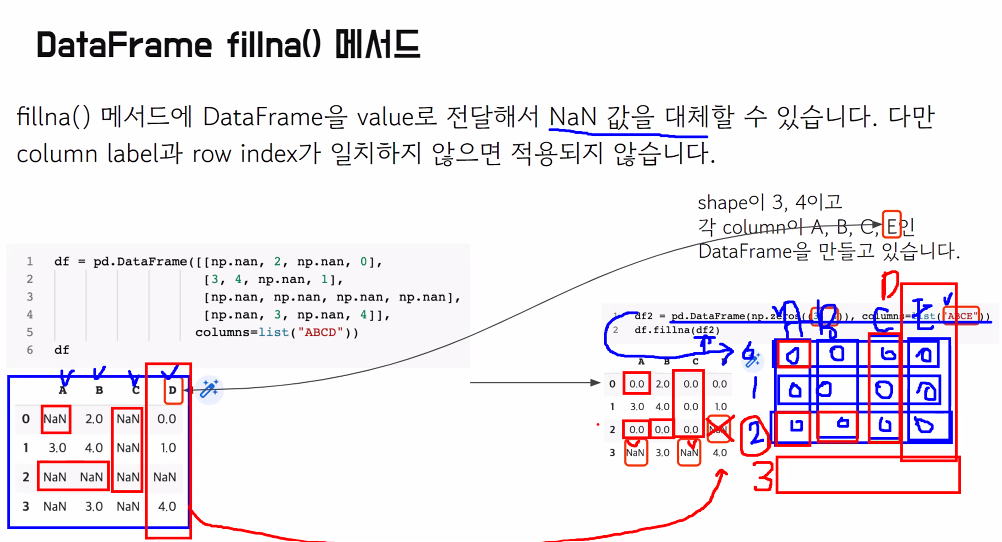

### < 연습 문제 >
- 타이타닉호의 승객 중 나이를 명시하지 않은 고객은 나이를 명시한 고객의 평균 나이 값이 되도록 titanic DataFrame을 고쳐보세요


- isnull() == isna()

In [146]:
titanic.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
adult/child    891
category1      891
dtype: int64

In [148]:
titanic[titanic['age'].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child,category1
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,child,child
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True,child,child
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True,child,child
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True,child,child
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True,child,child
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True,child,child
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False,child,child
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True,child,child
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True,child,child


In [169]:
titanic_age = round(titanic.age.fillna(titanic.age.mean()), 1)
titanic["age"] = titanic_age
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child,category1
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adult,male
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,female
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,female
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,female
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,adult,male
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child,child
888,0,3,female,29.7,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,child,child
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,adult,male


In [164]:
titanic_age = round(titanic.age.fillna(titanic.age.mean()), 1)

titanic_age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    29.7
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [165]:
titanic["age"] = titanic_age

In [166]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child,category1
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adult,male
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,female
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,female
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,female
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,adult,male
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child,child
888,0,3,female,29.7,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,child,child
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,adult,male


In [173]:
# 진명님

index = titanic[titanic.age.isna()].index
titanic.age = round(titanic.age.fillna(value = titanic.age.mean()))
# age column에서 NaN값에 소수점을 반올림한 age의 전체 평균 삽입
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child,category1
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adult,male
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,female
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,female
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,female
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,adult,male
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child,child
888,0,3,female,30.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,child,child
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,adult,male


In [ ]:
titanic.iloc[index]
# 기존 age가 NaN값인 자리를 DataFrame 형태로 조회

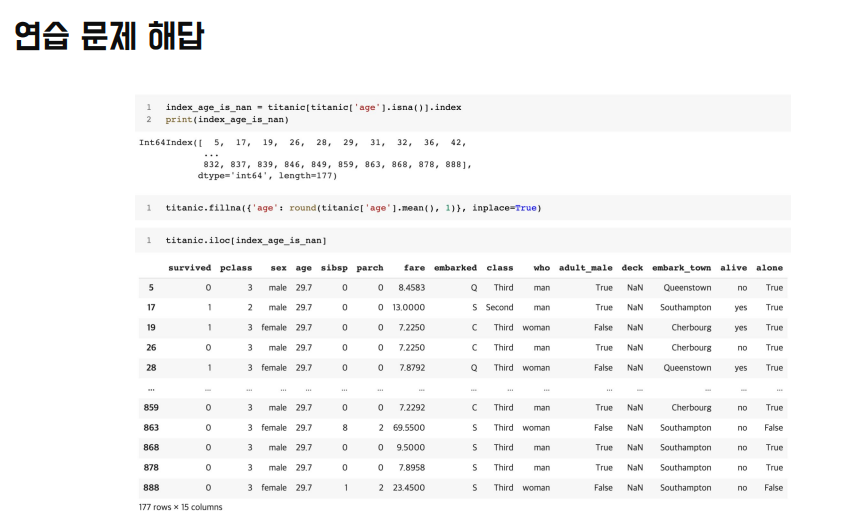

In [176]:
index_age_is_nan = titanic[titanic['age'].isna()].index
print(index_age_is_nan)

Int64Index([], dtype='int64')


In [188]:
titanic = titanic.fillna({'age' : round(titanic['age'].mean(), 1)})
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child,category1
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adult,male
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,female
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,female
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,female
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,adult,male
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child,child
888,0,3,female,30.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,child,child
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,adult,male


In [189]:
titanic.iloc[index_age_is_nan]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child,category1


In [190]:
titanic.sort_values(by = ["age"])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child,category1
803,1,3,male,0.0,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False,child,child
788,1,3,male,1.0,1,2,20.5750,S,Third,child,False,NaN,Southampton,yes,False,child,child
827,1,2,male,1.0,0,2,37.0042,C,Second,child,False,NaN,Cherbourg,yes,False,child,child
78,1,2,male,1.0,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False,child,child
469,1,3,female,1.0,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False,child,child
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,1,male,70.0,1,1,71.0000,S,First,man,True,B,Southampton,no,False,adult,male
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True,adult,male
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True,adult,male
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True,adult,male


### < DataFrame astype() 메서드>

- astype() 메서드로 column의 dtype을 바꾸는 것도 가능합니다. 
- 첫 인자로 변경해줄 dtype을 전달하면 됩니다.
- 예를 들면, int, “int32”, “i4”, “int64”, “category”, float, “float64”, “f8”, “object” 등이 있습니다.

- 아래 예제 코드에서는 dtype이 모두 int64인 DataFrame에 대해 astype(‘int32’)를 
호출해서 모든 column의 dtype을 형변환 시켰습니다.

In [191]:
d = {'col1' : [1, 2], 'col2' : [3, 4]}
df = pd.DataFrame(data = d)
df.dtypes

col1    int64
col2    int64
dtype: object

In [193]:
df.astype('int32').dtypes

col1    int32
col2    int32
dtype: object

- 이번에는 dtype을 dictionary로 전달해서 해당 column에만 형변환을 하는 예제입니다. 
col1을 key로 변환할 dtype을 value로 하는 dict 객체를 인수로 전달해 col1만 dtype을 
변경하였습니다.

In [196]:
df.astype({'col1' : 'int32'}).dtypes

col1    int32
col2    int64
dtype: object

### < 연습 문제 >
- employee.csv는 직원의 이름(First Name), 성별(Gender), 입사일(Start Date), 연봉(Salary), 관리자 여부(Mgmt), 팀(Team)의 열을 갖습니다.
- employees 변수에 위 csv 파일을 불러와서 DataFrame 객체로 만들어 할당합니다.
- Start Date는 날짜/시간 형태로 값을 불러옵니다.

In [199]:
employees = pd.read_csv("datas/employees.csv", 
                        parse_dates = ["Start Date"])

employees

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
...,...,...,...,...,...,...
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


### < 연습 문제 >
- employees의 데이터를 보면 Mgmt의 데이터 타입이 Object인 것을 확인할 수 있습니다. 
- Mgmt의 고유한 값들이 무엇이 있는지 확인하고 어떤 처리를 하면 좋을지 생각해보고 적용해보세요

In [201]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    object        
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      999 non-null    float64       
 4   Mgmt        933 non-null    object        
 5   Team        957 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 47.0+ KB


In [202]:
employees.Mgmt.value_counts()

True     468
False    465
Name: Mgmt, dtype: int64

In [227]:
employees.Mgmt.fillna(False, inplace = True)

In [233]:
employees.astype({'Mgmt' : 'bool'}).dtypes     # bool == ?

First Name    object
Gender        object
Start Date    object
Salary        object
Mgmt            bool
Team          object
dtype: object

In [229]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   First Name  1001 non-null   object
 1   Gender      1001 non-null   object
 2   Start Date  1001 non-null   object
 3   Salary      1001 non-null   object
 4   Mgmt        1001 non-null   bool  
 5   Team        1001 non-null   object
dtypes: bool(1), object(5)
memory usage: 40.2+ KB


### < 연습 문제 >
- employees의 데이터에서 Salary의 결측치가 2개 존재합니다. 
- 이 2개의 nan 값을 0으로 변경해봅시다. 
- 또 변경 Salary의 값이 소수점 값이 있는지 검토하고 없다면 int형으로 변경해봅시다.

In [236]:
employees.Salary = employees.Salary.fillna(0)

In [237]:
employees.Salary

0          False
1        61933.0
2       130590.0
3       138705.0
4       101004.0
          ...   
996      42392.0
997      96914.0
998      60500.0
999     129949.0
1000       False
Name: Salary, Length: 1001, dtype: object